### **1. IMPORT modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import multivariate_normal

### **2. Initialize Data**

In [2]:
def sampleInit():
  mu1, cov1 = np.array([1.5, 1.5]), np.array([[.30, .05],
                                              [.05, .30]])
  rv1 = stats.multivariate_normal(mu1, cov1)
  x1 = rv1.rvs(60)

  mu2, cov2 = np.array([1.5, -1.5]), np.array([[.50, -.08],
                                                [-.08, .50]])
  rv2 = stats.multivariate_normal(mu2, cov2)
  x2 = rv2.rvs(60)

  mu3, cov3 = np.array([-1.5, 1.5]), np.array([[.10, .03],
                                                [.03, .10]])
  rv3 = stats.multivariate_normal(mu3, cov3)
  x3 = rv3.rvs(60)

  mu4, cov4 = np.array([-1.5, -1.5]), np.array([[.80, .50],
                                                [.50, .80]])
  rv4 = stats.multivariate_normal(mu4, cov4)
  x4 = rv4.rvs(60)

  return np.vstack([x1, x2, x3, x4])

No handles with labels found to put in legend.


데이터의 총 개수 : 240
데이터의 차원    : 2


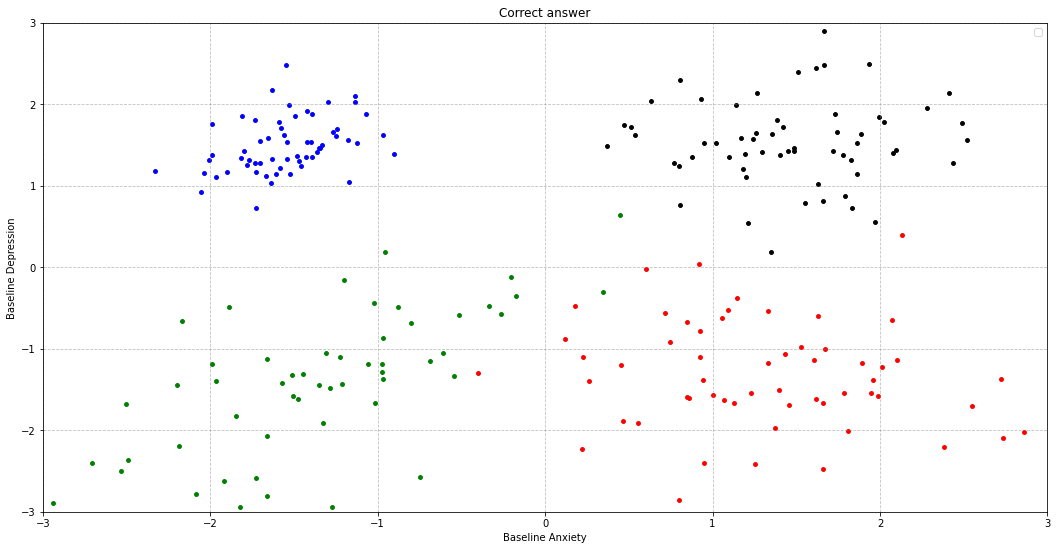

In [3]:
##############################
# INPUT
##############################

# DATA 초기화
data = sampleInit()

data_N = data.shape[0]
data_dim = data.shape[1]

print("데이터의 총 개수 : {0}\n".format(data_N)+\
      "데이터의 차원    : {0}".format(data_dim))

# DATA plot
xx = np.linspace(-3, 3, 1)
yy = np.linspace(-3, 3, 1)

xx = np.linspace(-3, 3, 1)
yy = np.linspace(-3, 3, 1)

plt.figure(figsize=(18, 9))
plt.scatter(data[0:60, 0], data[0:60, 1], s=15, color="black")
plt.scatter(data[60:120, 0], data[60:120, 1], s=15, color="red")
plt.scatter(data[120:180, 0], data[120:180, 1], s=15, color="blue")
plt.scatter(data[180:240, 0], data[180:240, 1], s=15, color="green")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Baseline Anxiety")
plt.ylabel("Baseline Depression")
plt.grid(True, color="gray", alpha=0.5, linestyle="--")
plt.title("Correct answer")
plt.legend()
plt.show()

In [4]:
maxIters = 200 # 1000
alpha = 2 # 0.01
mu_0 =  np.array([0, 0])

sigma_0 = np.diag((3**2, 3**2))
sigma_y = np.diag((1**2, 1**2))
tau_0 = np.linalg.inv(sigma_0)
tau_y = np.linalg.inv(sigma_y)

# c_init = np.random.randint(2, size=(data.shape[0], 1)).reshape(-1) # 두 개의 클러스터 : 완전 랜덤
# c_init = np.hstack([np.zeros(120, ), np.ones((120, ))]).astype(int) # 두개의 클러스터 : 왼쪽은 0, 오른쪽은 1
c_init = np.zeros(240,).astype(int) # 한개의 클러스터

##############################
# OUTPUT
##############################

res = np.full((maxIters, data_N), np.nan)

In [5]:
print("data shape     : {0}".format(data.shape))
print("mu_0 shape     : {0}".format('(1, 1)'))

print("sigma_0 shape  : {0}".format(sigma_0.shape))
print("sigma_y shape  : {0}".format(sigma_y.shape))
print("tau_0 shape    : {0}".format(tau_0.shape))
print("tau_y shape    : {0}".format(tau_y.shape))

print("c_init shape   : {0}".format(c_init.shape))
print("res shape      : {0}".format(res.shape))

data shape     : (240, 2)
mu_0 shape     : (1, 1)
sigma_0 shape  : (2, 2)
sigma_y shape  : (2, 2)
tau_0 shape    : (2, 2)
tau_y shape    : (2, 2)
c_init shape   : (240,)
res shape      : (200, 240)


### **3. Posterior 계산**

In [6]:
# 각각의 클러스터에 데이터가 몇 개 있는지를 반환

def nK():
  n_k = []
  for k in range(0, K): n_k.append(index_max_K.count(k))
  return n_k

In [7]:
# 1
def pp_exist(k):
  tau_p = tau_0 + n_k[k] * tau_y
  sigma_p = np.linalg.inv(tau_p)

  sum_data = 0 # avg_y * n_k
  for i in range(0, data_N): 
    if index_max_K[i] == k: sum_data = sum_data + data[i,:]
  mu_p = np.dot(sigma_p, (np.dot(tau_y, sum_data) + np.dot(tau_0, mu_0)))
  return np.exp(np.log(n_k[k]) + multivariate_normal.logpdf(data[i,:], mean=mu_p, cov=sigma_p+sigma_y))

def pp_new():
  return np.exp(np.log(alpha) + multivariate_normal.logpdf(data[i,:], mean=mu_0, cov=sigma_0+sigma_y))

In [8]:
# Prior 반환

def prior():
  return n_k[k] / (data_N - 1 + alpha), alpha / (data_N - 1 + alpha)

In [9]:
# 2
# def pp_exist(k):
#   tau_p = tau_0 + n_k[k] * tau_y
#   sigma_p = np.linalg.inv(tau_p)

#   sum_data = 0 # avg_y * n_k
#   for i in range(0, data_N): 
#     if index_max_K[i] == k: sum_data = sum_data + data[i,:]
#   mu_p = np.dot(sigma_p, (np.dot(tau_y, sum_data) + np.dot(tau_0, mu_0)))
#   return (prior_exist * multivariate_normal.pdf(data[i,:], mean=mu_p, cov=sigma_p+sigma_y))

# def pp_new():
#   return (prior_new * multivariate_normal.pdf(data[i,:], mean=mu_0, cov=sigma_0+sigma_y))

In [10]:
index_max_K = list(c_init)
K = c_init.max() + 1
n_k = nK()
print(n_k)

for r in range(0, maxIters):
  print("********** Iters # {0} **********".format(r))
  for i in range(0, data_N): # data_N
    # 1. 기존에 할당된 클러스터에서 제거 
    c_i = index_max_K[i]
    n_k[c_i] = n_k[c_i] - 1
    
    # print(c_i)
    # print(n_k) # 디버깅

    # 2. 만약 그 클러스터에 할당된 데이터가 0이 된다면, 맨 마지막 클러스터 제거
    if n_k[c_i] == 0:
      n_k[c_i] = n_k[K-1]
      for index, value in enumerate(index_max_K):
        if value == K-1: index_max_K[index] = c_i
      n_k = n_k[:K-1]
      K = K - 1
    index_max_K[i] = -1

    # 3. posterior 0~K(1~K+1)계산
    p = np.full((K+1, 1), np.nan)

    for k in range(0, K):
      prior_exist, prior_new = prior()
      p[k] = pp_exist(k)
    p[K] = pp_new()

    p /= p.sum()

    # print(p.reshape(-1)) # 디버깅

    # 4. Posterior에 따라 새로운 클러스터에 할당!
    new_ci = np.random.choice(range(0, K+1), 1, replace=True, p=p.reshape(K+1))
    # print("K : {0}, p : {1}".format(K, p.shape[0])) # 디버깅
    # print(prior_exist, prior_new)  # 디버깅

    # - 이때 새 클러스터가 추가될 경우
    if (new_ci[0] == K): 
      n_k.append(1)
      K = K + 1

    # - 기존의 클러스터에 추가될 경우
    else: n_k[new_ci[0]] = n_k[new_ci[0]] + 1

    index_max_K[i] = new_ci[0]
    # print(new_ci[0]) # 디버깅
    # print(n_k) # 디버깅
    # print('*****') # 디버깅
  print(n_k) # 디버깅
  res[r] = index_max_K

[240]
********** Iters # 0 **********
[215, 1, 1, 5, 1, 1, 15, 1]
********** Iters # 1 **********
[152, 3, 66, 2, 3, 1, 1, 1, 11]
********** Iters # 2 **********
[89, 1, 103, 5, 8, 33, 1]
********** Iters # 3 **********
[59, 1, 105, 18, 17, 37, 1, 2]
********** Iters # 4 **********
[69, 22, 118, 5, 6, 14, 1, 1, 1, 2, 1]
********** Iters # 5 **********
[113, 34, 33, 1, 28, 8, 4, 2, 1, 15, 1]
********** Iters # 6 **********
[67, 21, 16, 1, 76, 32, 2, 2, 1, 21, 1]
********** Iters # 7 **********
[58, 6, 7, 1, 101, 60, 3, 1, 2, 1]
********** Iters # 8 **********
[18, 26, 12, 1, 91, 76, 2, 8, 1, 1, 1, 3]
********** Iters # 9 **********
[5, 81, 2, 1, 41, 87, 1, 7, 10, 2, 2, 1]
********** Iters # 10 **********
[4, 101, 1, 1, 22, 65, 4, 2, 32, 7, 1]
********** Iters # 11 **********
[1, 81, 1, 2, 68, 53, 33, 1]
********** Iters # 12 **********
[1, 12, 3, 4, 154, 59, 5, 1, 1]
********** Iters # 13 **********
[12, 2, 5, 3, 157, 53, 1, 6, 1]
********** Iters # 14 **********
[18, 1, 2, 8, 107, 91, 

### **4. 결과 Plot**

In [11]:
# final_max = 240

# for r in range(0, maxIters):
#   final_case = r
#   final_yet = res[r].astype(int)
#   max_yet = final_yet.max()
#   if (max_yet < final_max) & (max_yet >= 3):
#     final_max = max_yet
#     final = list(final_yet)
#     final_count = []
#     for k in range(0, final_max+1): final_count.append(final.count(k))

In [12]:
final = res[maxIters-1].astype(int)
final_max = final.max()
final = list(final)
final_count = []
for k in range(0, final_max+1): final_count.append(final.count(k))

In [13]:
print(final)
print(final_max)
print(final_count)

[10, 7, 0, 7, 7, 10, 0, 4, 10, 6, 6, 0, 7, 7, 7, 7, 3, 0, 7, 2, 7, 7, 0, 6, 7, 0, 11, 7, 7, 1, 0, 7, 0, 10, 7, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 10, 0, 7, 0, 0, 0, 11, 7, 0, 6, 9, 0, 4, 0, 6, 7, 0, 0, 4, 10, 4, 7, 0, 0, 8, 0, 0, 0, 0, 0, 0, 9, 7, 7, 10, 9, 9, 0, 0, 6, 4, 0, 7, 7, 0, 0, 0, 7, 7, 0, 4, 0, 7, 7, 0, 4, 7, 10, 10, 0, 12, 10, 0, 0, 0, 0, 0, 7, 1, 4, 0, 6, 1, 0, 1, 0, 1, 1, 0, 7, 0, 0, 0, 6, 9, 6, 0, 7, 0, 0, 10, 7, 4, 10, 7, 0, 0, 7, 1, 4, 0, 0, 7, 0, 0, 0, 7, 0, 1, 6, 7, 10, 7, 6, 13, 5, 0, 0, 7, 1, 6, 0, 0, 0, 0, 7, 0, 0, 0, 1, 0, 0, 1, 4, 0, 6, 0, 7, 7, 0, 0, 1, 10, 7, 7, 7, 6, 0, 7, 0, 14, 7, 14, 14, 0, 7, 14, 14, 0, 10, 7, 0, 7, 6, 14, 7, 10, 7, 10, 14, 7, 7, 14, 7, 14, 14, 14, 7, 14, 5, 7, 14, 0, 7, 0, 14, 10, 14, 7, 14, 7, 5, 14, 7, 14]
14
[88, 13, 1, 1, 12, 3, 15, 61, 1, 5, 18, 2, 1, 1, 18]


In [14]:
classified = []

for k in range(0, final_max+1):
  classified.append(np.full((2, ), np.nan))

for i in range(0, 240):
  k = final[i]
  classified[k] = np.vstack([classified[k], data[i]])

for k in range(0, final_max+1):
  classified[k] = classified[k][1:,:]

No handles with labels found to put in legend.


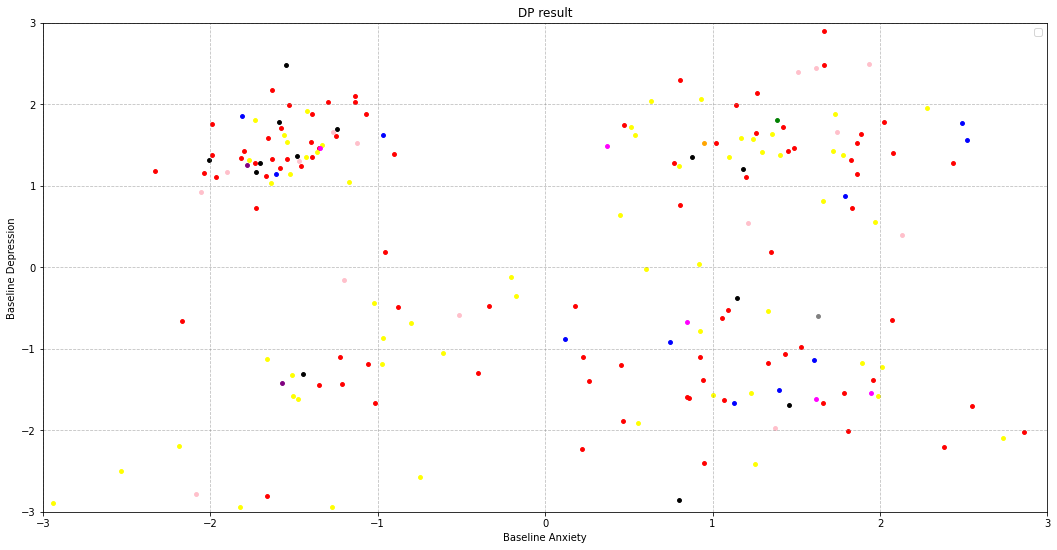

In [15]:
xx = np.linspace(-3, 3, 1)
yy = np.linspace(-3, 3, 1)

plt.figure(figsize=(18, 9))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Baseline Anxiety")
plt.ylabel("Baseline Depression")
plt.grid(True, color="gray", alpha=0.5, linestyle="--")
plt.title("DP result")
plt.legend()

plt.scatter(classified[0][:, 0], classified[0][:, 1], s=15, color="red")
plt.scatter(classified[1][:, 0], classified[1][:, 1], s=15, color="black")
plt.scatter(classified[2][:, 0], classified[2][:, 1], s=15, color="orange")
plt.scatter(classified[3][:, 0], classified[3][:, 1], s=15, color="green")
plt.scatter(classified[4][:, 0], classified[4][:, 1], s=15, color="blue")
plt.scatter(classified[5][:, 0], classified[5][:, 1], s=15, color="purple")
plt.scatter(classified[6][:, 0], classified[6][:, 1], s=15, color="pink")
plt.scatter(classified[7][:, 0], classified[7][:, 1], s=15, color="yellow")
plt.scatter(classified[8][:, 0], classified[8][:, 1], s=15, color="gray")
plt.scatter(classified[9][:, 0], classified[9][:, 1], s=15, color="magenta")

plt.show()